In [1]:
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

True

/Users/gordontveito-duncan/Documents/GitHub/prompt-engineering-for-generative-ai-examples/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


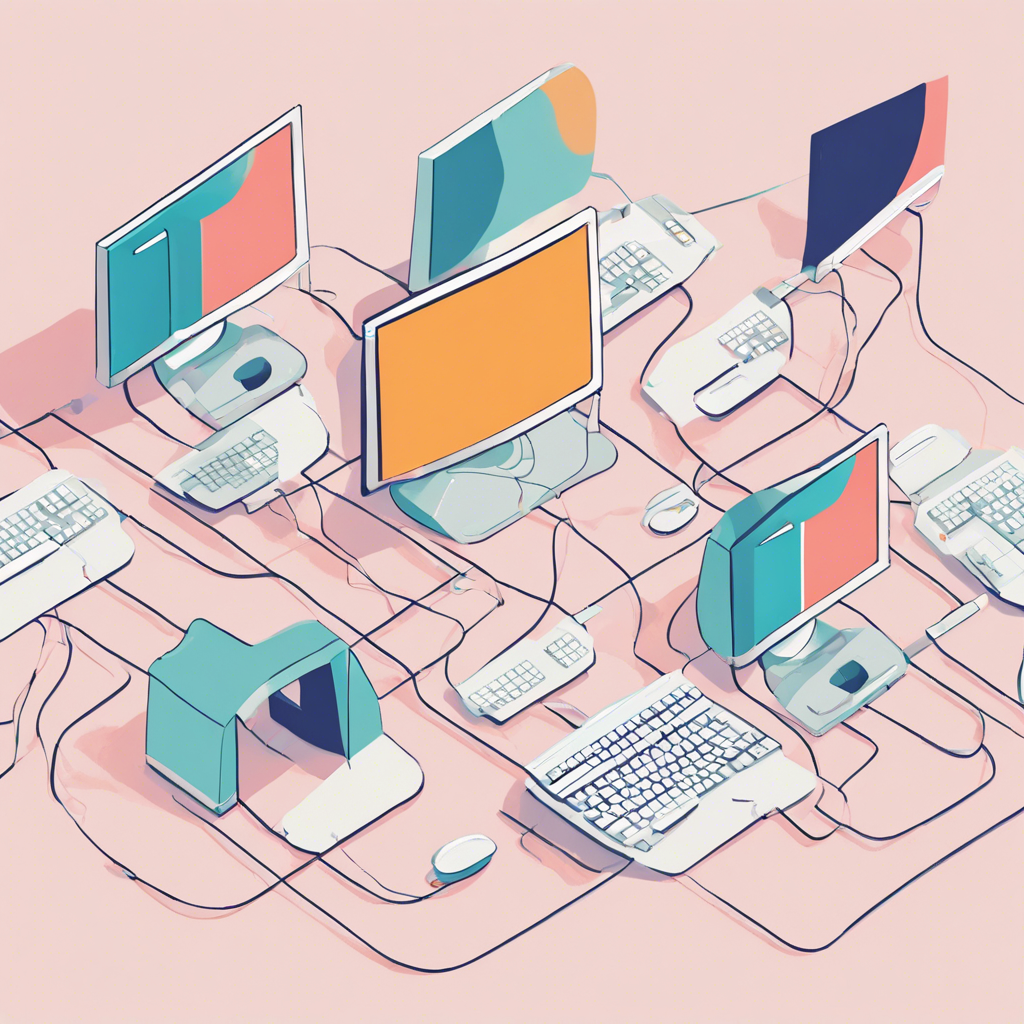

In [2]:
import os
import base64
import requests
from IPython.display import Image

engine_id = "stable-diffusion-xl-1024-v1-0"
api_host = os.getenv('API_HOST', 'https://api.stability.ai')
api_key = os.getenv("STABILITY_API_KEY")

image_description = "computers being tied together"
prompt = f"""an illustration of {image_description}. in the
style of corporate memphis, white background, professional,
clean lines, warm pastel colors"""

response = requests.post(
    f"{api_host}/v1/generation/{engine_id}/text-to-image",
    headers={
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": f"Bearer {api_key}"
    },
    json={
        "text_prompts": [
            {
                "text": prompt,
            }
        ],
        "cfg_scale": 7,
        "height": 1024,
        "width": 1024,
        "samples": 1,
        "steps": 30,
    },
)

if response.status_code != 200:
    raise Exception(
        "Non-200 response: " + str(response.text))

data = response.json()

image_paths = []

# if there's no /out folder, create it
if not os.path.exists("./out"):
    os.makedirs("./out")

for i, image in enumerate(data["artifacts"]):
    filename = f"./out/image-{i}.png"
    with open(filename, "wb") as f:
        f.write(base64.b64decode(image["base64"]))
    
    image_paths.append(filename)

# display the first image
Image(filename=image_paths[0])